# Decompose HSC observed dual AGN

This notebook requires standard python libraries and the publicly available packages on github:
See https://github.com/dartoon/galight/blob/master/requirements.txt

This notebook has been tested with galight ==  0.0.0

For more information, please contact me: dingxuheng@126.com

This notebook is almost identical to the 'galight_HSC_QSO.ipynb', only that two point source are considerred.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits

#Data is available at: #Data is available at: https://drive.google.com/file/d/1Axwo-aD5yFrkuHIlYBsQ8ma1nHRpcAHg/view?usp=sharing
fitsFile = pyfits.open('../example_files/HSC/dual_QSO/141637.44+003352.2_HSC-I.fits')

#Load the fov image data:
fov_image = fitsFile[1].data # check the back grounp

#Derive the header informaion, might be used to obtain the pixel scale and the exposure time.
header = fitsFile[1].header # if target position is add in WCS, the header should have the wcs information, i.e. header['EXPTIME']

#Derive the fov noise level map:
err_data= fitsFile[3].data ** 0.5

#Calculate the zeropoint for HSC filters:
file_header0 = fitsFile[0].header
FLUXMAG0 = file_header0['FLUXMAG0']
zp =  2.5 * np.log10(FLUXMAG0)   # This is something Xuheng can't make sure.

#Load the PSF data:
PSF = pyfits.getdata('../example_files/HSC/dual_QSO/141637.44+003352.2_HSC-I_psf.fits')

Estimating the background light ... ... ...


/Users/Dartoon/Astro/my_packages/galight/galight/tools/measure_tools.py:599: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax1.imshow(image, origin='lower', cmap=my_cmap, norm=LogNorm(), vmin=vmin, vmax=vmax)


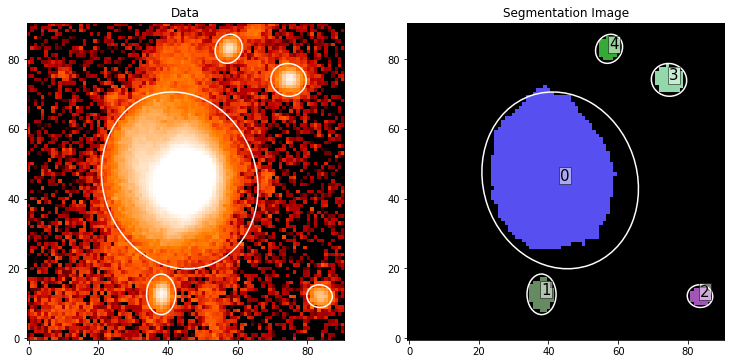

 id xcentroid ycentroid     source_sum         orientation      area 
       pix       pix                               deg          pix2 
--- --------- --------- ------------------ ------------------- ------
  2     38.04     12.55  35.25341064967811  -89.69868041172577   53.0
  1     83.52     12.04 13.757030933362241  -6.521603659370882   26.0
  0     43.38     45.26 2977.2986763320423  -71.13409143553358 1238.0
  3     74.62     74.11  34.70280717568303 -11.680316013122729   52.0
  4     57.42     83.02  21.37463340106741   59.01029101990615   35.0
Input directly the a obj idx to mask, use space between each id:
1 3
The data_process is ready to go to pass to FittingSpecify!


In [2]:
from galight.data_process import DataProcess
image_RA = 214.156021
image_DEC = 0.564521
data_process = DataProcess(fov_image = fov_image, fov_noise_map = err_data, target_pos = [image_RA, image_DEC],
                           pos_type = 'wcs', header = header,
                          rm_bkglight = True, if_plot=False, zp = zp)

#Manually input the fov noise map:
data_process.fov_noise_map = err_data

#Generate the fitting materials
data_process.generate_target_materials(radius=45, create_mask = True, nsigma=2.8,
                                      exp_sz= 1.2, npixels = 15, if_plot=False)

#Manually input the PSF:
data_process.PSF_list = [PSF]

#Check if all the materials is given, if so to pass to the next step.
data_process.checkout() #Check if all the materials is known.

The settings for the fitting is done. Ready to pass to FittingProcess. 
  However, please make updates manullay if needed.


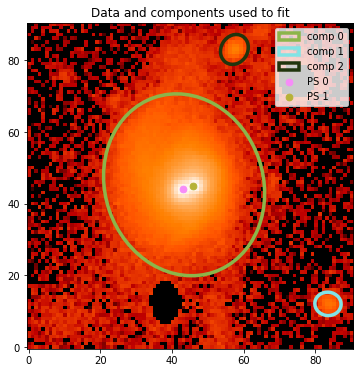

In [3]:
#%%Start to produce the class and params for lens fitting.
from galight.fitting_specify import FittingSpecify
fit_sepc = FittingSpecify(data_process)
fit_sepc.prepare_fitting_seq(point_source_num = 2) #point_source_num =2 for dual AGN.

#Plot the initial settings for fittings. 
fit_sepc.plot_fitting_sets()

fit_sepc.build_fitting_seq()

Computing the PSO ...
10
20
30
40
50
Max iteration reached! Stopping.
-9.888106495439036 reduced X^2 of best position
-40041.88725328038 logL
8099.0 effective number of data points
[] lens result
[] source result
[{'amp': 1, 'R_sersic': 3.908985155631326, 'n_sersic': 4.621792456766859, 'e1': -0.1275015974990233, 'e2': -0.05182498808860978, 'center_x': 0.09449818194587778, 'center_y': -0.08281031252656228}, {'amp': 1, 'R_sersic': 0.5113382422133492, 'n_sersic': 1.506252839871831, 'e1': -0.18403715634974305, 'e2': -0.07456801742065415, 'center_x': -6.496154998087519, 'center_y': -5.530147948750482}, {'amp': 1, 'R_sersic': 0.1466301860847393, 'n_sersic': 1.9958985710973767, 'e1': -0.12804902959100967, 'e2': -0.2542723755308586, 'center_x': -2.082349132116911, 'center_y': 6.349232811290527}] lens light result
[{'ra_image': array([0.4064052]), 'dec_image': array([-0.22075961]), 'point_amp': array([1.])}, {'ra_image': array([-0.23820413]), 'dec_image': array([0.00636881]), 'point_amp': array

100%|██████████| 130/130 [09:23<00:00,  4.33s/it]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  100
Sampling iterations (in current run): 130
567.8984467983246 time taken for MCMC sampling
628.483 total time taken for the overall fitting (s)
============ CONGRATULATION, YOUR JOB WAS SUCCESSFUL ================ 
Start transfering the Params to fluxs...
6600 MCMC samplers in total, finished translate: 1000
6600 MCMC samplers in total, finished translate: 2000
6600 MCMC samplers in total, finished translate: 3000
6600 MCMC samplers in total, finished translate: 4000
6600 MCMC samplers in total, finished translate: 5000
6600 MCMC samplers in total, finished translate: 6000


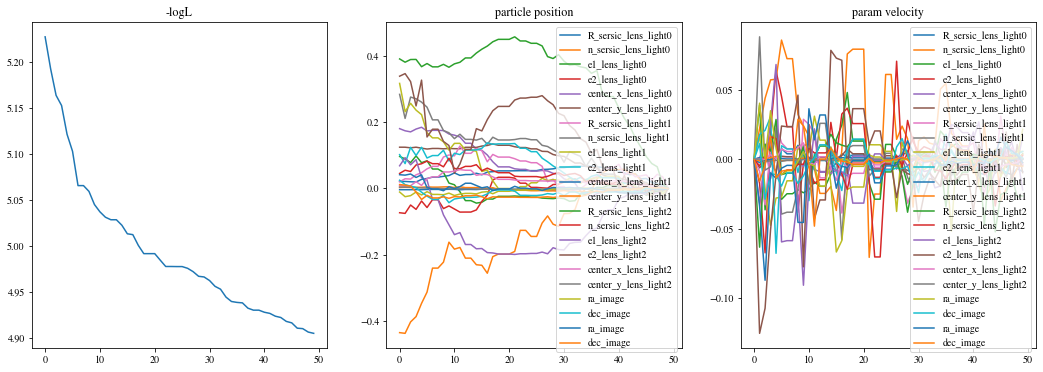

<Figure size 432x288 with 0 Axes>

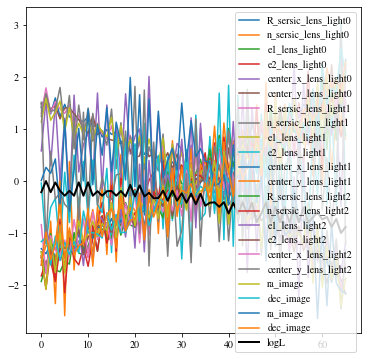

-9.709610365707142 reduced X^2 of all evaluated imaging data combined.
reduced chi^2 of data  0 =  9.709610365707142


/Users/Dartoon/.local/lib/python3.6/site-packages/lenstronomy/Plots/plot_util.py:199: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("gist_heat"))
  cmap.set_bad(color='k', alpha=1.)
/Users/Dartoon/.local/lib/python3.6/site-packages/lenstronomy/Plots/plot_util.py:200: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("gist_heat"))
  cmap.set_under('k')


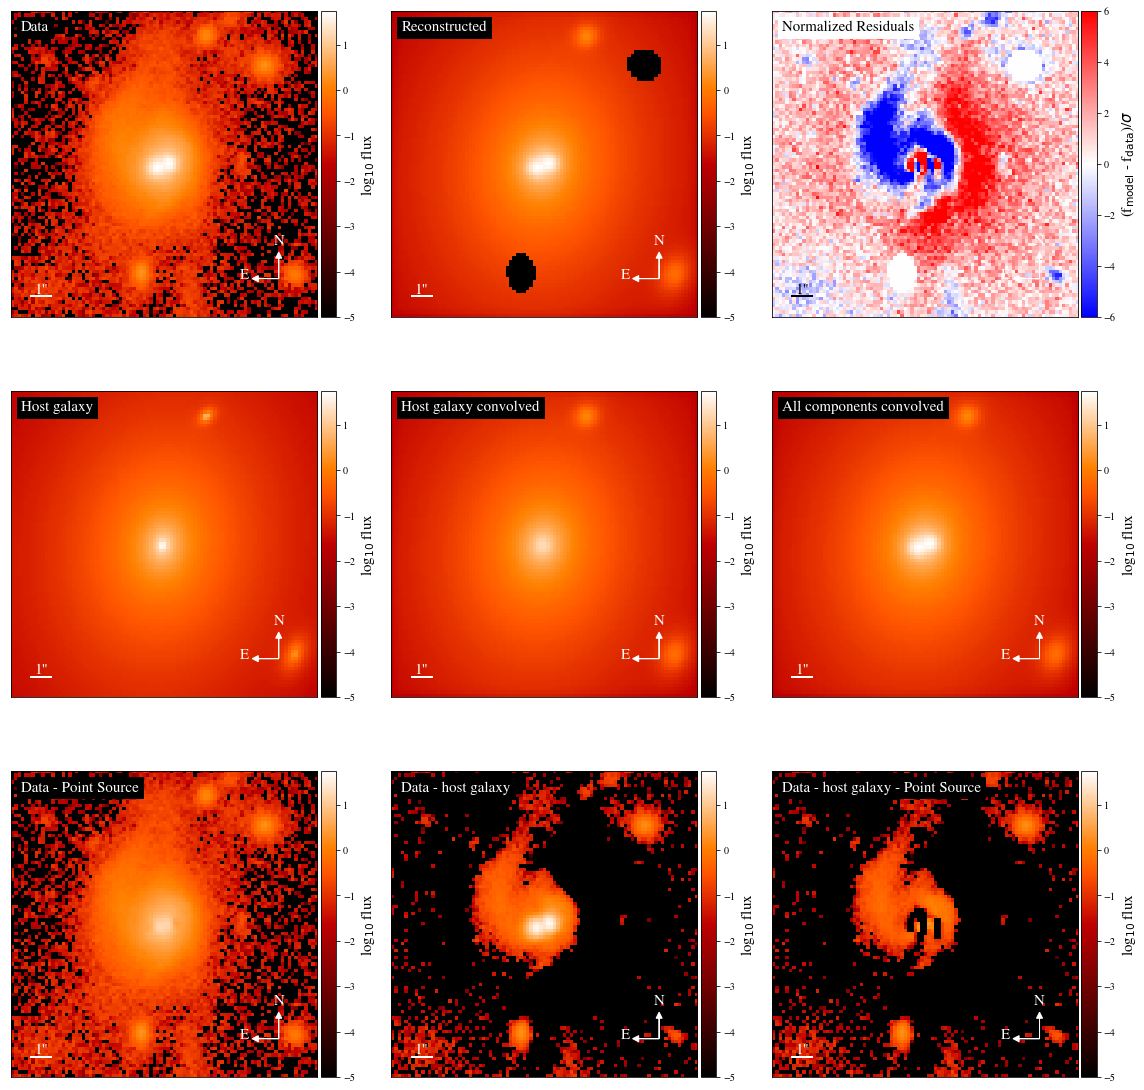

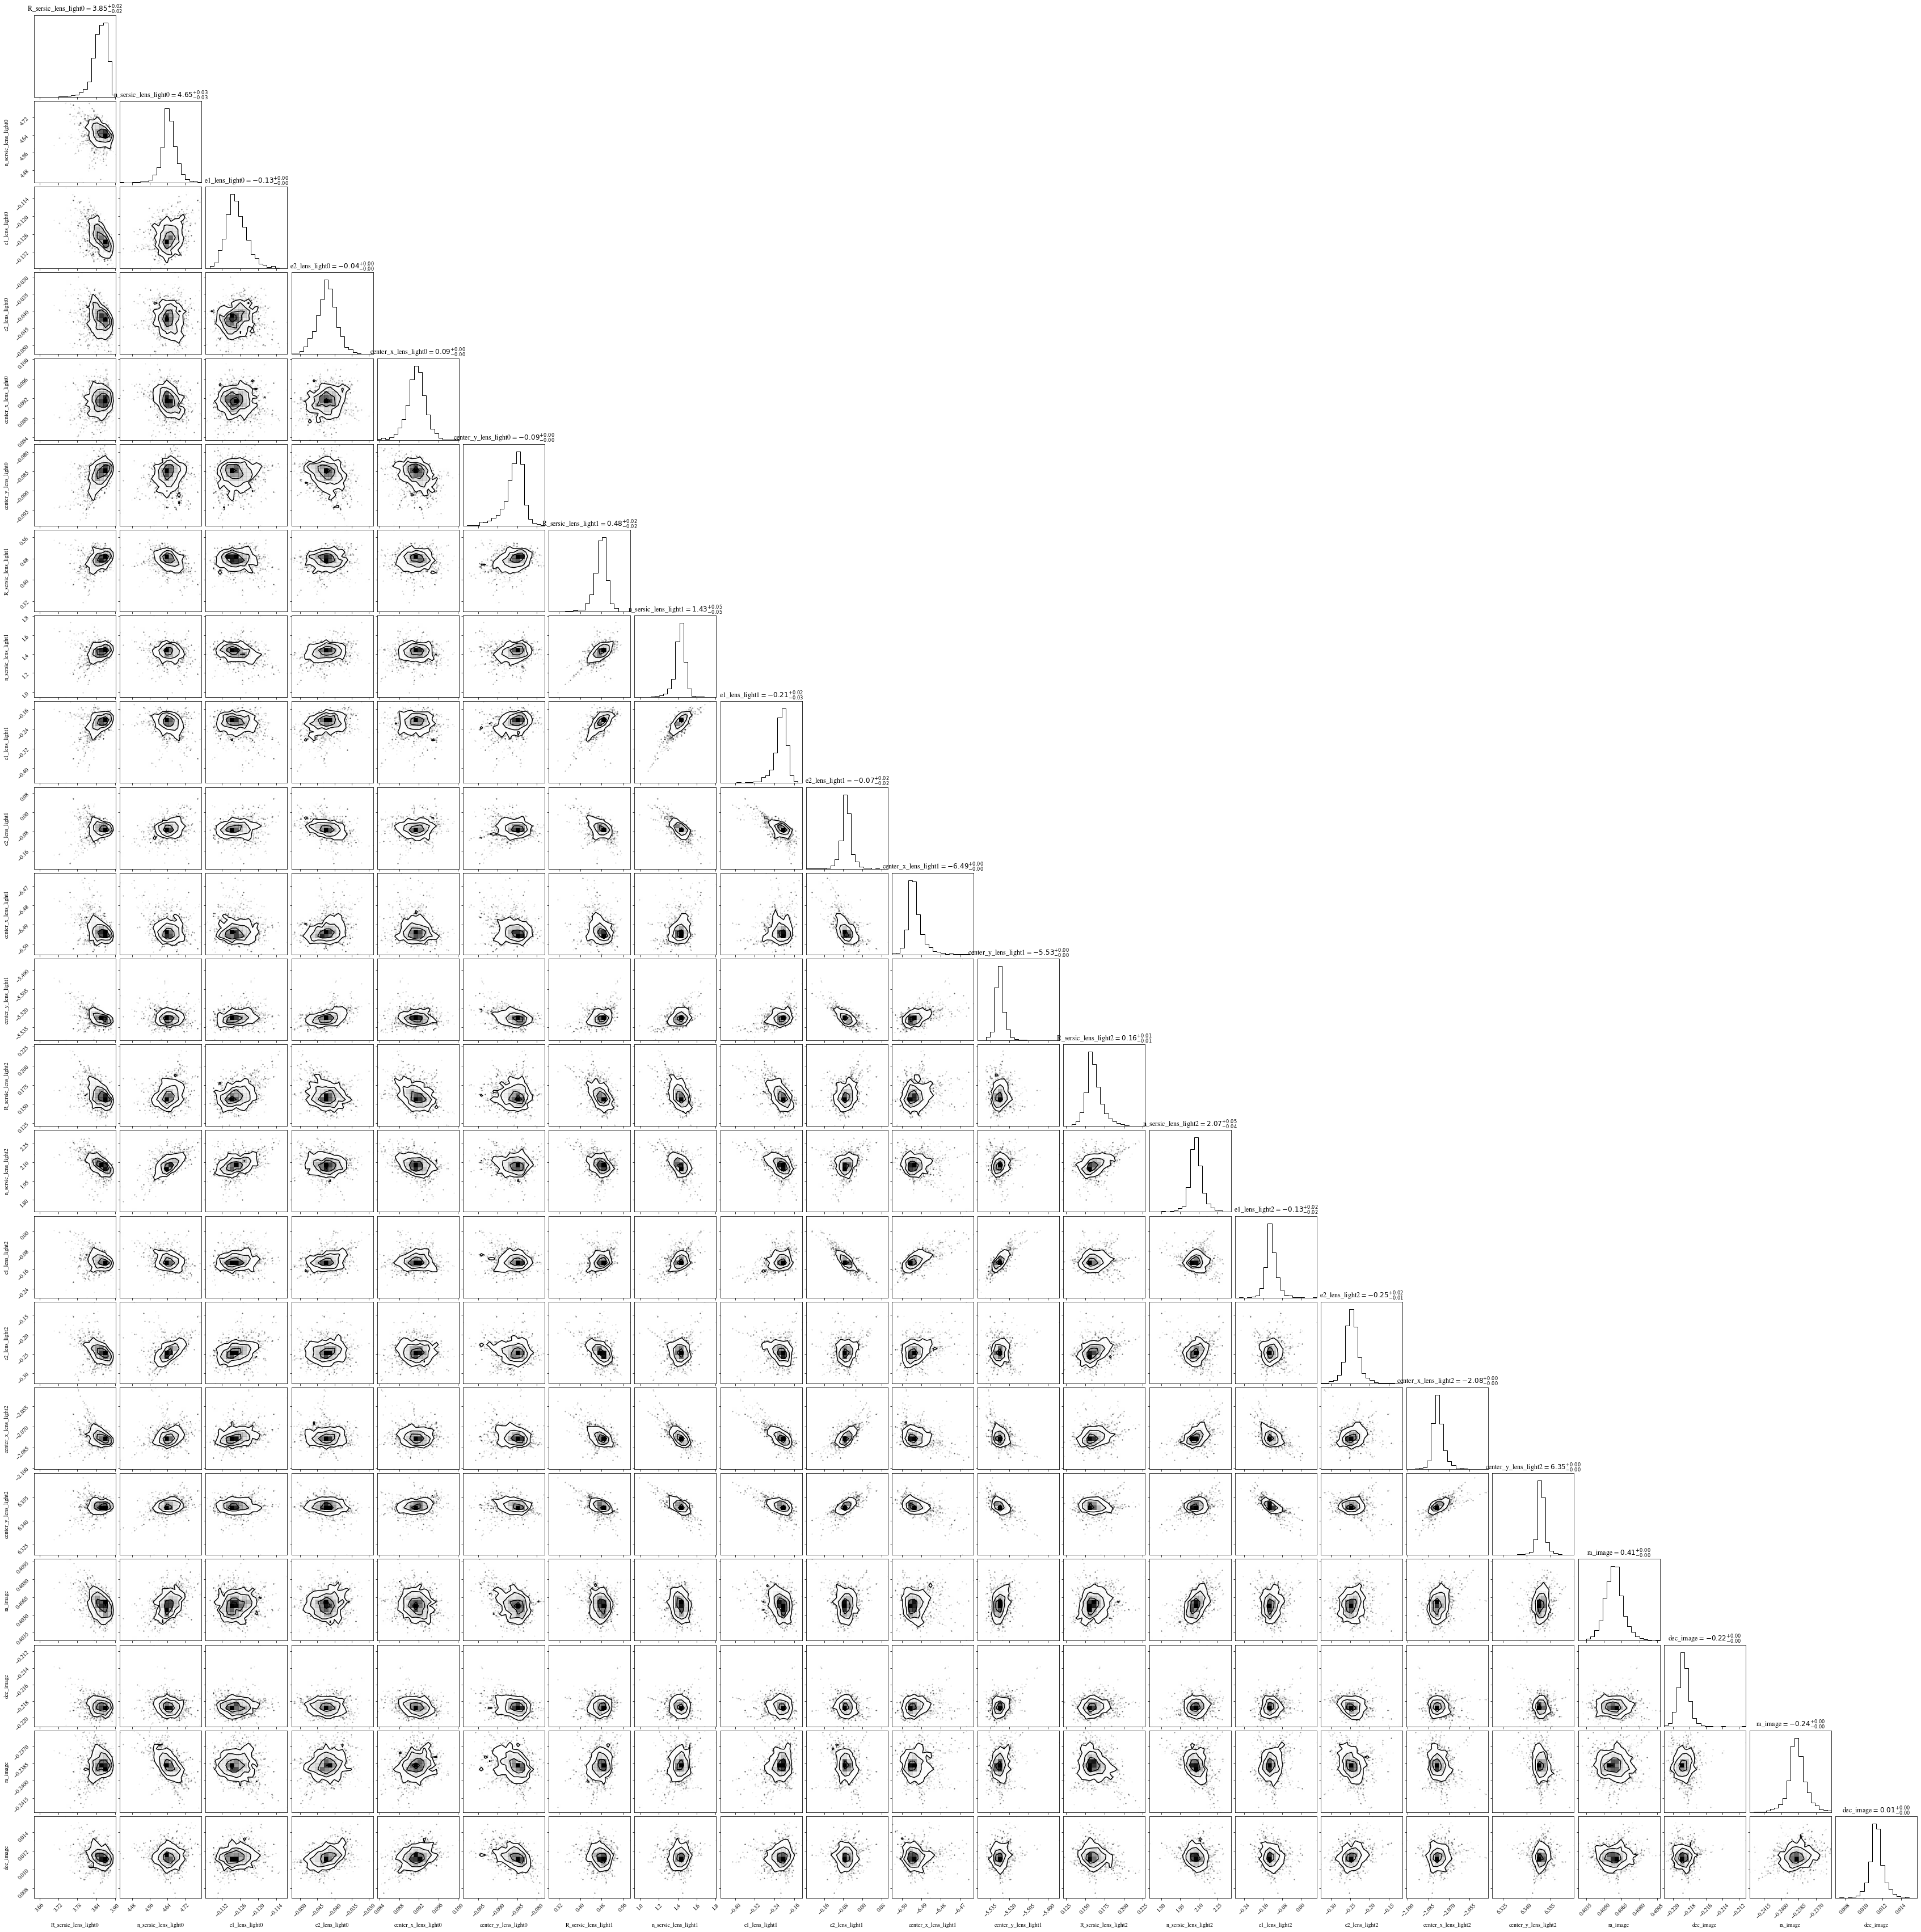

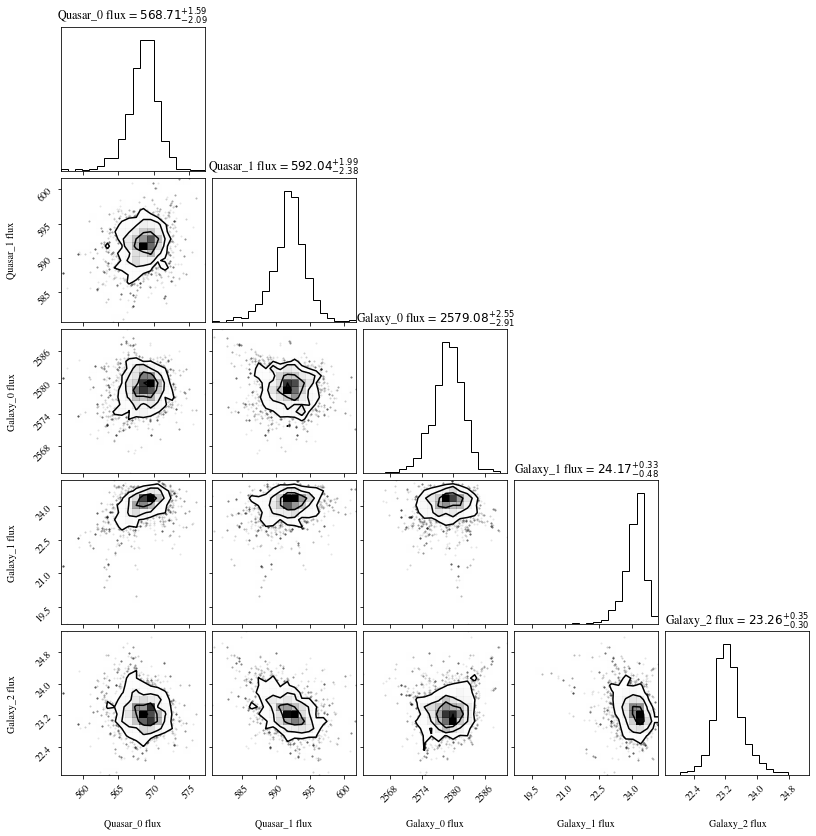

/Users/Dartoon/Astro/my_packages/galight/galight/tools/plot_tools.py:105: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  vmax = flux_list_2d[0].max(), vmin = 1.e-4)


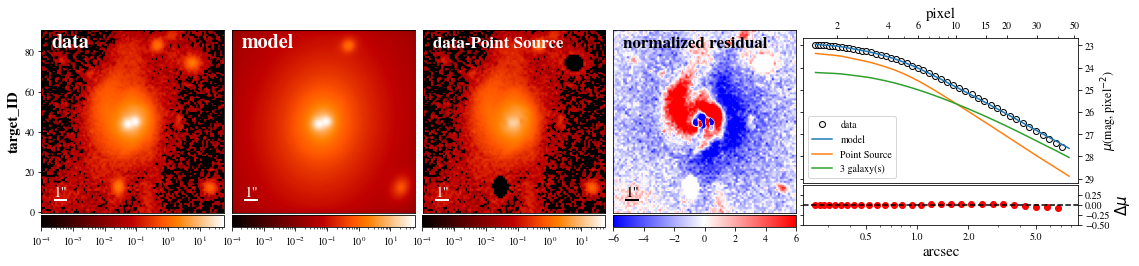

In [4]:
#%%Setting the fitting method and run.
from galight.fitting_process import FittingProcess
fit_run = FittingProcess(fit_sepc, savename = 'HSC_dualAGN')
fit_run.run()
fit_run.plot_all()
fit_run.dump_result()


In [5]:
#Load the saved fitting class, the fitting_run_result would be the loaded as fit_run() in previous fittings.
import pickle
picklename = 'HSC_dualAGN.pkl'
fitting_run_result = pickle.load(open(picklename,'rb'))
#fitting_run_result.plot_final_qso_fit()
fitting_run_result.final_result_galaxy

[{'amp': 13.63684477456581,
  'R_sersic': 3.7057756720659274,
  'n_sersic': 4.593434817452648,
  'e1': -0.12134267643174618,
  'e2': -0.03819463486844009,
  'center_x': 0.08861061274401665,
  'center_y': -0.09424826438146512,
  'phi_G': -1.4183220379068917,
  'q': 0.774289240488261,
  'flux_sersic_model': 3513.8789334295802,
  'flux_within_frame': 2572.5547675972384,
  'magnitude': 18.47408842672764},
 {'amp': 9.444356957195152,
  'R_sersic': 0.5494469805996225,
  'n_sersic': 1.6716608488253824,
  'e1': -0.1597279508357683,
  'e2': -0.17618227048134744,
  'center_x': -6.4763561245423364,
  'center_y': -5.496147680668625,
  'phi_G': -1.1536246672680541,
  'q': 0.6157579186092715,
  'flux_sersic_model': 26.366835706622915,
  'flux_within_frame': 25.043072600032186,
  'magnitude': 23.503280968668555},
 {'amp': 79.42696923274833,
  'R_sersic': 0.16816924373642556,
  'n_sersic': 2.136973528324852,
  'e1': 0.005714095221048793,
  'e2': -0.19089929219695745,
  'center_x': -2.092615061788282,
